In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy import stats
from numpy.polynomial.polynomial import polyfit
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [39]:
df = pd.read_csv("../results_with_th.csv",names=['domain','exp','slot','prec','rec','f1','count','slot_count','context_count'],delimiter=" ")

In [40]:
best_exp_per_domain = {}
best_exp_per_domain['book_restaurant'] = '4x'
best_exp_per_domain['rate_book'] = '4x'
best_exp_per_domain['search_screening_event'] = '4x'
best_exp_per_domain['search_creative_work'] = '4x'
best_exp_per_domain['get_weather'] = '4x'
best_exp_per_domain['play_music'] = '4x'
best_exp_per_domain['add_to_playlist'] = '4x'
best_exp_per_domain['th.alarm'] = '4x'
best_exp_per_domain['th.reminder'] = '1x'
best_exp_per_domain['th.weather'] = '4x'

#df = df[df['exp'].isin(['baseline','4x'])]

In [41]:
df_baseline = df[df['exp']=='baseline']
df_1x = df[df['exp']=='1x']
df_2x = df[df['exp']=='2x']
df_4x = df[df['exp']=='4x']

In [42]:
df_best = pd.concat([df[(df['domain']==domain) & (df['exp']==best_exp_per_domain[domain])] for domain in best_exp_per_domain])

In [43]:
df_baseline = pd.concat([df[(df['domain']==domain) & (df['exp']=='baseline')] for domain in best_exp_per_domain])

In [44]:
ours = df_best['f1'].values
bl = df_baseline['f1'].values
counts = df_best['count'].values
slot_counts = df_best['slot_count'].values #/ counts
context_counts = df_best['context_count'].values #/ counts
domains = df_best['domain'].values
slots = df_best['slot'].values

In [45]:
df_best['slot'].values == df_baseline['slot'].values,df_best['domain'].values == df_baseline['domain'].values

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True]))

In [46]:
rimps = np.around(100*(ours-bl)/(100.001-bl),decimals=2)
aimps = np.around((ours-bl),decimals=2)

In [47]:
np.mean(aimps)

1.467936507936508

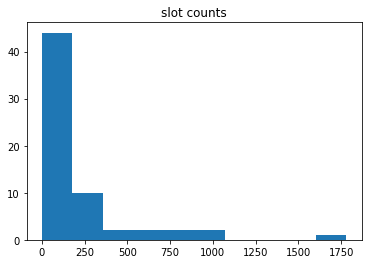

In [48]:
plt.hist(slot_counts)
plt.title("slot counts")
plt.show()

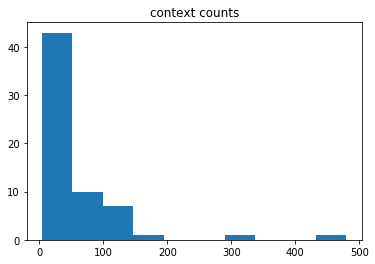

In [49]:
plt.hist(context_counts)
plt.title("context counts")
plt.show()

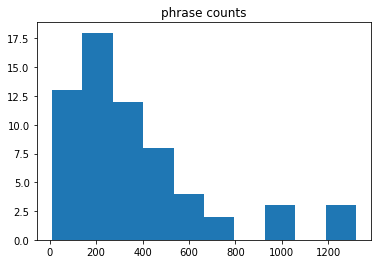

In [50]:
plt.hist(counts)
plt.title("phrase counts")
plt.show()

In [51]:
len(slot_counts),len(context_counts)

(63, 63)

In [79]:
metrics = [(domain,slot,count,slot_count,context_count,rimp,aimp,b,o) 
           for domain,slot,count,slot_count,context_count,rimp,aimp,b,o 
           in zip(domains,slots,counts,slot_counts,context_counts,rimps,aimps,bl,ours)
           if abs(rimp)<500 ]#and count>100]
metrics = sorted(metrics,key=lambda x : x[0])
len(metrics)

62

In [80]:
domains,slots,counts,slot_counts,context_counts,rimps,aimps,bl,ours = zip(*metrics)

In [82]:
headers = ["domain","slot","count","slot_count","context_count","rimp","aimp","baseline","ours"]
pd.DataFrame(metrics)

,0,1,2,3,4,5,6,7,8
0,add_to_playlist,entity_name,271,599,23,8.63,1.32,84.70,86.02
1,add_to_playlist,artist,376,646,29,-0.27,-0.02,92.60,92.58
2,add_to_playlist,playlist,942,807,67,35.94,1.79,95.02,96.81
3,add_to_playlist,music_item,446,5,141,19.78,0.20,98.99,99.19
4,add_to_playlist,playlist_owner,543,43,28,39.54,0.38,99.04,99.42
5,book_restaurant,poi,59,74,21,7.03,1.44,79.53,80.97
6,book_restaurant,restaurant_name,168,267,15,9.11,1.74,80.90,82.64
7,book_restaurant,cuisine,106,72,23,13.36,2.00,85.03,87.03
8,book_restaurant,served_dish,142,159,15,6.05,0.75,87.60,88.35
9,book_restaurant,country,178,155,12,22.96,2.06,91.03,93.09


In [76]:
for k in zip(domains,slots,slot_counts,context_counts,rimps,aimps,bl,ours,counts) : print(k)

('th.reminder', 'reminder/recurring_period', 20, 13, 1.69, 1.12, 33.79, 34.91, 9)
('play_music', 'album', 213, 16, 0.56, 0.32, 42.7, 43.02, 85)
('th.reminder', 'reminder/reference', 8, 4, 95.76, 50.16, 47.62, 97.78, 9)
('play_music', 'track', 228, 15, -2.85, -1.18, 58.58, 57.4, 101)
('play_music', 'playlist', 149, 14, -0.57, -0.2, 65.12, 64.92, 84)
('play_music', 'genre', 69, 15, 13.39, 2.98, 77.74, 80.72, 72)
('book_restaurant', 'poi', 74, 21, 7.03, 1.44, 79.53, 80.97, 59)
('th.reminder', 'reminder/todo', 413, 26, 6.24, 1.26, 79.81, 81.07, 361)
('book_restaurant', 'restaurant_name', 267, 15, 9.11, 1.74, 80.9, 82.64, 168)
('th.reminder', 'datetime', 85, 112, 6.92, 1.22, 82.37, 83.59, 1320)
('add_to_playlist', 'entity_name', 599, 23, 8.63, 1.32, 84.7, 86.02, 271)
('book_restaurant', 'cuisine', 72, 23, 13.36, 2.0, 85.03, 87.03, 106)
('book_restaurant', 'served_dish', 159, 15, 6.05, 0.75, 87.6, 88.35, 142)
('th.weather', 'location', 270, 32, 37.91, 4.66, 87.71, 92.37, 206)
('th.alarm', 'd

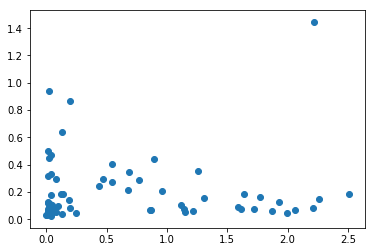

In [55]:
plt.scatter(np.array(slot_counts)/np.array(counts),np.array(context_counts)/np.array(counts))

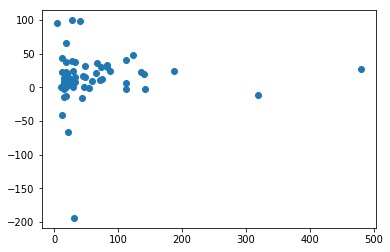

In [58]:
plt.scatter(context_counts,rimps)

In [72]:
context_counts = np.array(context_counts)
slot_counts = np.array(slot_counts)
counts = np.array(counts)

print(stats.spearmanr(aimps,context_counts/counts))
print(stats.spearmanr(rimps,context_counts/counts))

print(stats.spearmanr(aimps,slot_counts/counts))
print(stats.spearmanr(rimps,slot_counts/counts))

print(stats.spearmanr(aimps,counts))
print(stats.spearmanr(rimps,counts))

SpearmanrResult(correlation=0.09854152875825903, pvalue=0.4460699063725966)
SpearmanrResult(correlation=-0.051335660934834645, pvalue=0.6919186728837226)
SpearmanrResult(correlation=0.17697956636189163, pvalue=0.16880041484549763)
SpearmanrResult(correlation=-0.2686901866363955, pvalue=0.034719668488662904)
SpearmanrResult(correlation=-0.01418261088273776, pvalue=0.9128798620508174)
SpearmanrResult(correlation=0.2274227317763782, pvalue=0.07545981062034302)


In [86]:
context_counts = np.array(context_counts)
slot_counts = np.array(slot_counts)
counts = np.array(counts)

print(stats.spearmanr(aimps,context_counts+slot_counts))
print(stats.spearmanr(rimps,context_counts+slot_counts))

print(stats.kendalltau(aimps,slot_counts+context_counts))
print(stats.kendalltau(rimps,slot_counts+context_counts))

#print(stats.spearmanr(aimps,counts))
#print(stats.spearmanr(rimps,counts))

SpearmanrResult(correlation=0.11243781416488387, pvalue=0.3842553804407911)
SpearmanrResult(correlation=-0.1426772166245065, pvalue=0.26861853651222467)
KendalltauResult(correlation=0.09668022310436901, pvalue=0.26874154916724513)
KendalltauResult(correlation=-0.10568266011549088, pvalue=0.22656779470937904)


In [70]:
print(stats.kendalltau(aimps,context_counts))
print(stats.kendalltau(rimps,context_counts))

print(stats.kendalltau(aimps,slot_counts))
print(stats.kendalltau(rimps,slot_counts))

print(stats.kendalltau(aimps,counts))
print(stats.kendalltau(rimps,counts))

KendalltauResult(correlation=0.089816279332148, pvalue=0.3069619972905733)
KendalltauResult(correlation=0.149119481787829, pvalue=0.08977537800475012)
KendalltauResult(correlation=0.10812250716301955, pvalue=0.2172537099712003)
KendalltauResult(correlation=-0.14962728425818583, pvalue=0.08764974894222435)
KendalltauResult(correlation=-0.005844859110168848, pvalue=0.9467042201860958)
KendalltauResult(correlation=0.14555138038457247, pvalue=0.09590377710233927)


In [32]:
print(stats.pearsonr(aimps,context_counts))
print(stats.pearsonr(rimps,context_counts))

print(stats.pearsonr(aimps,slot_counts))
print(stats.pearsonr(rimps,slot_counts))

print(stats.pearsonr(aimps,counts))
print(stats.pearsonr(rimps,counts))

(-0.02948966352084168, 0.8339687742875107)
(0.060964403449784994, 0.664543974978716)
(0.13301789471274894, 0.3423552363703669)
(-0.08332492548226361, 0.5530588374033999)
(0.18959873353862697, 0.17390709297990392)
(0.1625586360289824, 0.24483748736115324)


(array([ 0.,  3.,  1.,  9., 19., 10.,  7.,  6.,  3.,  1.,  1.,  0.,  0.]),
 array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,
         3.5,  4. ,  4.5]),
 <a list of 13 Patch objects>)

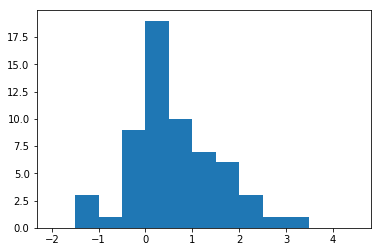

In [69]:
plt.hist(aimps,bins=[i*0.5 for i in range(-4,10)])

In [34]:
stats.spearmanr(aimps,slot_counts),stats.spearmanr(rimps,slot_counts)

(SpearmanrResult(correlation=0.23943378042072475, pvalue=0.08421168806721958),
 SpearmanrResult(correlation=-0.2312873051562837, pvalue=0.09564866026100717))

12 -7.9975 57.067068309285574
27 17.96888888888889 34.166481119640714
14 19.600714285714282 17.910376267996842


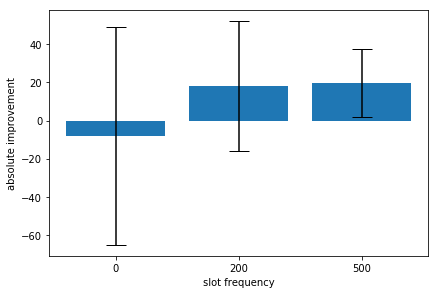

In [36]:
intervals = [0,200,500,10000]
means = []
stds = []
for i in range(len(intervals)-1):
    z = [x for x,y in zip(rimps,counts) if intervals[i]<y<intervals[i+1]]
    mean = np.mean(z)
    std = np.std(z)
    print(len(z),mean,std)
    means.append(mean)
    stds.append(std)
    
plt.bar(list(map(str,intervals[:-1])), means,yerr=stds, capsize=10)
plt.tight_layout()
plt.ylabel("absolute improvement")
plt.xlabel("slot frequency")
plt.show()

11 13.754545454545456 15.517726733487947
10 16.609999999999996 45.343893524927914
2 43.965 4.425000000000001
6 33.9 33.57300949671725
24 2.2862500000000003 42.921940078521224


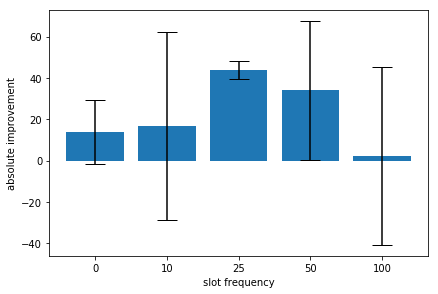

In [37]:
intervals = [0,10,25,50,100,2000]
means = []
stds = []
for i in range(len(intervals)-1):
    z = [x for x,y in zip(rimps,slot_counts) if intervals[i]<y<intervals[i+1]]
    mean = np.mean(z)
    std = np.std(z)
    print(len(z),mean,std)
    means.append(mean)
    stds.append(std)
    
plt.bar(list(map(str,intervals[:-1])), means,yerr=stds, capsize=10)
plt.tight_layout()
plt.ylabel("absolute improvement")
plt.xlabel("slot frequency")
plt.show()

24 6.042083333333333 25.43371187668817
12 10.155 70.6181102244082
13 19.30153846153846 15.073557002581017
3 13.303333333333333 17.404969277638944


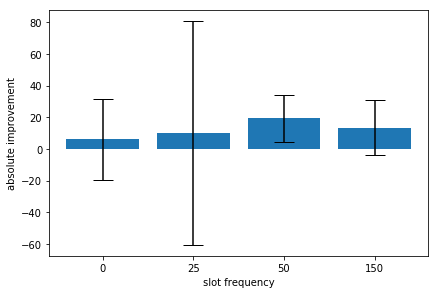

In [455]:
intervals = [0,25,50,150,1000]
means = []
stds = []
for i in range(len(intervals)-1):
    z = [x for x,y in zip(rimps,context_counts) if intervals[i]<y<intervals[i+1]]
    mean = np.mean(z)
    std = np.std(z)
    print(len(z),mean,std)
    means.append(mean)
    stds.append(std)
    
plt.bar(list(map(str,intervals[:-1])), means,yerr=stds, capsize=10)
plt.tight_layout()
plt.ylabel("absolute improvement")
plt.xlabel("slot frequency")
plt.show()

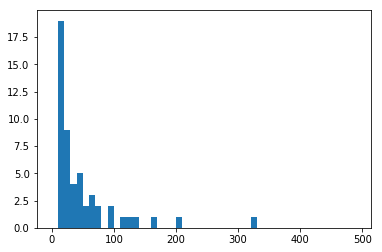

In [397]:
plt.hist(context_counts,bins=[10*i for i in range(0,50)])
plt.show()

In [398]:
sorted(context_counts)

[10,
 12,
 12,
 12,
 13,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 16,
 18,
 18,
 18,
 19,
 19,
 21,
 22,
 22,
 23,
 23,
 23,
 24,
 27,
 28,
 30,
 32,
 33,
 37,
 40,
 43,
 43,
 44,
 45,
 59,
 59,
 61,
 61,
 66,
 70,
 74,
 92,
 99,
 113,
 126,
 136,
 168,
 208,
 323]

In [390]:
slot_counts

(1,
 2,
 3,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 9,
 12,
 12,
 17,
 17,
 18,
 18,
 19,
 20,
 23,
 24,
 26,
 43,
 65,
 66,
 69,
 72,
 74,
 74,
 116,
 116,
 149,
 155,
 159,
 188,
 213,
 224,
 228,
 267,
 269,
 286,
 287,
 314,
 487,
 599,
 646,
 778,
 807,
 918,
 969,
 1781)

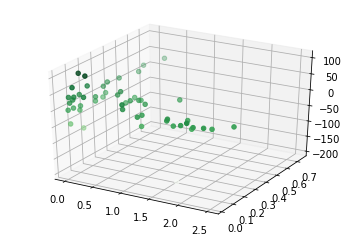

In [357]:
ax = plt.axes(projection='3d')

#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = rimps
xdata = slot_counts
ydata = context_counts
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');